In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This exam has 10 questions for a 100 points total.
* Q1 is 5 points
* Q2-Q6 are 9 points each
* Q7-Q9 are 12 points each
* Q10 is 14 points

You will analyze a dataset of tennis matches played in 2015. The data is in the file **ATPmatches.csv**. Each tennis match has several sets, and each set has several games. Whoever wins 6 games in a set is the winner of the set. Matches are won by whoever wins enough sets; the number of sets you need to win varies between competitions.

### [Q1 5 points] Read in the data.
The data is in a CSV file named **ATPmatches.csv**

In [2]:
df = pd.read_csv('ATPmatches.csv', dtype=unicode)
print df[:5]

  tourney_id tourney_name surface         winner_name     winner_age  \
0   2015-329        Tokyo    Hard  Stanislas Wawrinka  30.5215605749   
1   2015-329        Tokyo    Hard         Tatsuma Ito  27.3812457221   
2   2015-329        Tokyo    Hard     Austin Krajicek  25.3032169747   
3   2015-329        Tokyo    Hard          Joao Sousa  26.5160848734   
4   2015-329        Tokyo    Hard        Gilles Simon  30.7707049966   

           loser_name      loser_age              score  
0      Radek Stepanek  36.8542094456            7-5 6-3  
1  Yoshihito Nishioka  20.0219028063        3-6 6-0 7-5  
2       Matthew Ebden  27.8576317591  5-7 7-6(4) 7-6(5)  
3     Feliciano Lopez  34.0396988364        6-4 4-6 6-1  
4     Mikhail Youzhny  33.2785763176            6-4 6-4  


### [Q2 9 points] How many games did Roger Federer win?

In [3]:
# Create a mask for winners with name Roger Federer
mask_rf_wins = df['winner_name'] == 'Roger Federer'

# Apply the mask and get len of his name
series_rf_wins = df['winner_name'][mask_rf_wins]

print len(series_rf_wins)

63


### [Q3 9 points] Which players have beaten Roger Federer, and how often?

In [4]:
# Get a df of just winners and losers
df_winners_and_losers = df[['winner_name', 'loser_name']]

# Create and apply a mask of rf losing
mask_rf_lose = df['loser_name'] == 'Roger Federer'
df_rf_loses = df_winners_and_losers[mask_rf_lose]

# Grap the value counts of the winner's name
series_winners_beat_rf = df_rf_loses['winner_name'].value_counts()
print series_winners_beat_rf

Novak Djokovic        5
Nick Kyrgios          1
John Isner            1
Albert Ramos          1
Andreas Seppi         1
Gael Monfils          1
Stanislas Wawrinka    1
Name: winner_name, dtype: int64


### [Q4 9 points] How many players have won at least one game? Lost at least one game?

In [5]:
# Print the unique winners and losers names
print len(df['winner_name'].unique())
print len(df['loser_name'].unique())

287
404


### [Q5 9 points] Create a column called 'winner_loser' of the form 'winner_name beat loser_name score'.

For example, for the first row, the winner_loser column should have the value 'Stanislas Wawrinka beat Radek Stepanek 7-5 6-3'

In [6]:
# Create a new column and winner and loser name plus score
# User string concatenation
df['winner_loser'] = df['winner_name'] + ' beat ' + df['loser_name'] + ' ' + df['score']

### [Q6 9 points] Plot the 10 most common scores and their frequencies.
A score of '6-3 6-4' is different from '6-4 6-3'.

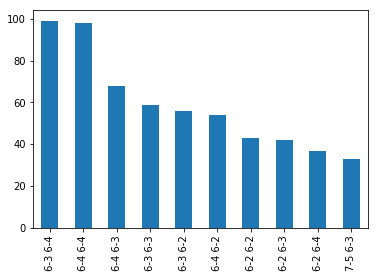

In [7]:
# Get a series of only scores
series_scores = df['score']

# Get the value counts of the scores
series_scores_counts = series_scores.value_counts()

# Sort the series in descending order
series_scores_counts.sort_values(ascending=False)

# Plot the results
series_scores_counts[:10].plot(kind='bar')

### [Q7 12 points] Find the number of matches for each value of the number of sets played.
If a match has a score '6-3 6-4', there were two "sets" played, the first ending with '6-3' and the second with '6-4'. Similarly, if the score was '6-0 6-1 6-2', there were 3 sets played. You want to figure out how many matches had 2 sets, 3 sets, and so on...

In [13]:
# Create a new column for the number of sets played
# Iterate over the score using map and return the number of sets
def numSet(s):
    '''s is a string\n Returns the number of sets in the match'''
    return (s.count('-'))

df['sets'] = df['score'].map(numSet)

print df['sets'].value_counts()

print df['score'].str.split().apply(len).value_counts()


2    1383
3    1191
4     208
5     136
1      28
0      12
Name: sets, dtype: int64
2    1370
3    1213
4     218
5     145
1      11
6       1
Name: score, dtype: int64


### [Q8 12 points] Among the players who have played at least 50 matches (i.e., there are 50 or more matches where they were either the winner or the loser),  output the top 10 players with the highest winning ratio (i.e., ratio of number of wins to number of games played)

In [9]:
# Create a mask to find the number of players whom played at least 50 matches
mask_50_matches = (df['winner_name'].value_counts() + \
                   df['loser_name'].value_counts() >=50)

# Get a series of wins and losses with index as players name
series_wins = df['winner_name'].value_counts()[mask_50_matches]
series_lose = df['loser_name'].value_counts()[mask_50_matches]
series_total_games = series_wins + series_lose

series_ratio = series_wins / series_total_games
print series_ratio.sort_values(ascending=False)[:10]

Novak Djokovic        0.932584
Roger Federer         0.851351
Andy Murray           0.825581
David Ferrer          0.774648
Kei Nishikori         0.763889
Rafael Nadal          0.753086
Stanislas Wawrinka    0.743243
Tomas Berdych         0.721519
Richard Gasquet       0.716667
Jack Sock             0.660377
dtype: float64


### [Q9 12 points] King of each surface.

Figure out which player has won the most games for each surface.

In [10]:
# Create a pivot table of each winner and surface 
# Add a dummy column
df['DUMMY'] = 1
pt_winner_surface = pd.pivot_table(df, columns='surface', index='winner_name', 
                                   values='DUMMY', aggfunc=sum)

# Get the player with the most wins for each surface
print pt_winner_surface.idxmax()

surface
Clay       Rafael Nadal
Grass       Andy Murray
Hard     Novak Djokovic
dtype: object


### [Q10 14 points] Create a new column called 'winner_age_group'. Take the age of the winning player and set the value for the new column to 'Baby' if the age is less than 20, 'Youngster' if the age is at least 20 but less than 25, 'Prime' if it is at least 25 but less than 30, and 'Oldie' otherwise. Figure out how many unique winner_names belong to each winner_age_group.

In [11]:
def ageCategory(age):
    '''age is a string\n Returns the string of the category'''
    
    age = float(age)
    cat = ''
    
    if age < 20.0:
        cat = 'Baby'
    elif age < 25.0:
        cat = 'Youngster'
    elif age < 30.0:
        cat = 'Prime'
    elif age > 30:
        cat = 'Oldie'
    
    return cat
# Create a new column for winner age group
df['winner_age_group'] = df['winner_age'].map(ageCategory)

# Get only the unique names for each category
df_unique_winner_age = df[['winner_name', 'winner_age_group']].drop_duplicates()

print df_unique_winner_age['winner_age_group'].value_counts()

Prime        122
Youngster     91
Oldie         69
Baby          23
Name: winner_age_group, dtype: int64
